In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dx = pd.read_json('elcinema_rev.json')
dx.insert(4, 'Year', dx['Year_Week'].apply(lambda x:x[0]))
dx.insert(5, 'Week', dx['Year_Week'].apply(lambda x:x[1]))
dx.drop('Year_Week', axis=1, inplace=True)
#dx = dx[ dx['Year']>2017 ]
#dc = dx.groupby('Week').agg(sum)['Week Revenue']
dx

,Index,Img,Link,Title,Year,Week,Week Revenue,Total Revenue,Rating
0,1,https://media.elcinema.com/uploads/_315x420_bd...,/work/1684488/,بلبل حيران,2011,1,852249,17543670,7.2
1,2,https://media.elcinema.com/uploads/_315x420_da...,/work/1411307/,ابن القنصل,2011,1,754077,11888857,8.2
2,3,https://media.elcinema.com/uploads/_315x420_19...,/work/1610187/,بون سواريه,2011,1,718571,4863597,3.7
3,4,https://media.elcinema.com/uploads/_315x420_42...,/work/1528600/,٦٧٨ (ستة - سبعة - ثمانية),2011,1,458906,4561164,5.8
4,5,https://media.elcinema.com/uploads/_315x420_db...,/work/1872179/,زهايمر,2011,1,154265,13875419,7.5
...,...,...,...,...,...,...,...,...,...
9269,21,https://media.elcinema.com/uploads/_315x420_4e...,/work/2060631/,The Host,2021,15,7251,73044,4.3
9270,22,https://media.elcinema.com/uploads/_315x420_59...,/work/2067998/,Don't Look Back,2021,15,5316,107418,4.3
9271,23,https://media.elcinema.com/uploads/_315x420_b6...,/work/2067226/,The 100 Candles Game,2021,15,4938,844052,5.0
9272,24,https://media.elcinema.com/uploads/_315x420_a6...,/work/2060630/,شاومينج,2021,15,2881,747716,6.5


dy = pd.read_json('elcinema.json')
#dy = dy[ (dy['Type']=='فيلم') & (dy['Year'] > 2009) ]
dy

In [5]:
dz = pd.read_json('elcinema3.json')
dz['IYWR'] = dz['IYWR'].apply(pd.DataFrame.from_dict)

dz = dz[ (dz['Total Revenue']> 0.85*1000000) ]
da = dz[ dz['IYWR'].apply(lambda x: True if x['Week Revenue'].iloc[1] > x['Week Revenue'].iloc[0] else False) ]
db = dz[ dz['IYWR'].apply(lambda x: True if x['Week Revenue'].iloc[1] < x['Week Revenue'].iloc[0] else False) ]

In [30]:
h = pd.read_json('Holidays.json')
h = h[ h['Year']==2019 ]
h['Duration'] = h['Duration']*20

In [31]:
dz.sort_values('Total Revenue')

,Img,Link,Title,Rating,IYWR,Total Revenue
1328,https://media.elcinema.com/uploads/_315x420_7f...,/work/2055099/,Malicious,5.1,Index Year Week Week Revenue 6723 ...,857084
1417,https://media.elcinema.com/uploads/_315x420_b6...,/work/2047999/,Hellboy,6.8,Index Year Week Week Revenue 7194 ...,857125
974,https://media.elcinema.com/uploads/_315x420_90...,/work/2039835/,Eloise,4.4,Index Year Week Week Revenue 4909 ...,858328
514,https://media.elcinema.com/uploads/_315x420_7a...,/work/2024395/,Seventh Son,6.5,Index Year Week Week Revenue 2694 ...,861877
286,https://media.elcinema.com/uploads/_315x420_85...,/work/2009663/,After Earth,6.4,Index Year Week Week Revenue 1545 ...,863382
...,...,...,...,...,...,...
1266,https://media.elcinema.com/uploads/_315x420_d3...,/work/2049624/,البدلة,7.5,Index Year Week Week Revenue 6375 ...,67339111
1441,https://media.elcinema.com/uploads/_315x420_a7...,/work/2051732/,الممر,8.5,Index Year Week Week Revenue 7367 ...,74495223
1440,https://media.elcinema.com/uploads/_315x420_3b...,/work/2054027/,كازابلانكا,7.9,Index Year Week Week Revenue 7366 ...,79156808
1474,https://media.elcinema.com/uploads/_315x420_6d...,/work/2052471/,ولاد رزق 2: عودة أسود الأرض,8.0,Index Year Week Week Revenue 7554 ...,100753422


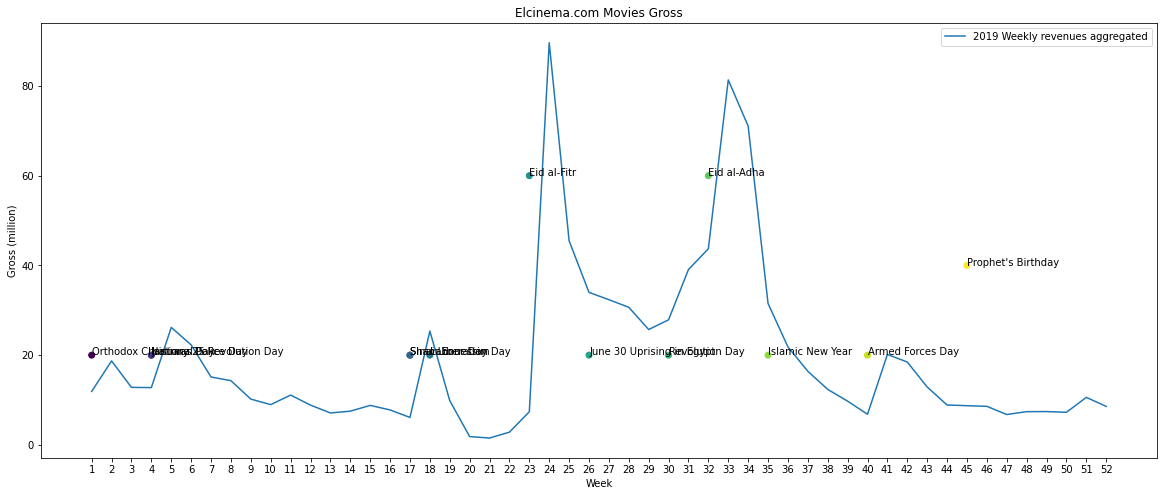

In [43]:
plt.figure(figsize=(20,8))
plt.xticks(range(1,53))
plt.xlabel('Week')
plt.ylabel('Gross (million)')
plt.title('Elcinema.com Movies Gross')
#plt.scatter(
#    dz['IYWR'].apply(lambda x: x.iloc[0]['Week'])*7/30,
#    dz['IYWR'].apply(lambda x: x.iloc[0]['Week Revenue'])/1000000,
#    label='First week revenue for a movie'
#)
for yr in range(2019,2020):
    plt.plot(dx[ dx['Year']==yr ].groupby('Week').agg(sum)['Week Revenue'].index, dx[ dx['Year']==yr ].groupby('Week').agg(sum)['Week Revenue']/1000000, label=f'{yr} Weekly revenues aggregated')
plt.scatter(h['Week'], h['Duration'], c=h.index)
for i in range(len(h['Week'])):
    plt.text(h['Week'].iloc[i], h['Duration'].iloc[i] , h['Holiday'].iloc[i], fontsize=10)
plt.legend()
plt.show()

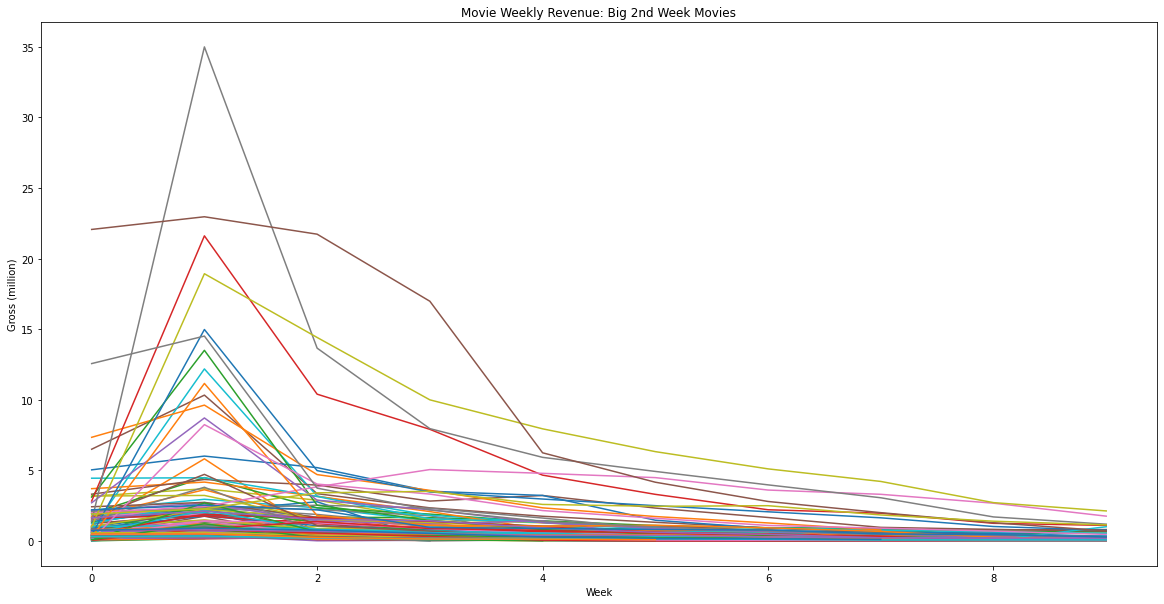

In [6]:
plt.figure(figsize=(20,10))
for i, mv in enumerate(da['IYWR']):
    plt.plot(range(len(mv['Week Revenue'][:10])), mv['Week Revenue'][:10]/1000000, label=da.iloc[i]['Title'])

plt.xlabel('Week')
plt.ylabel('Gross (million)')
#plt.legend()
plt.title('Movie Weekly Revenue: Big 2nd Week Movies')
plt.show()

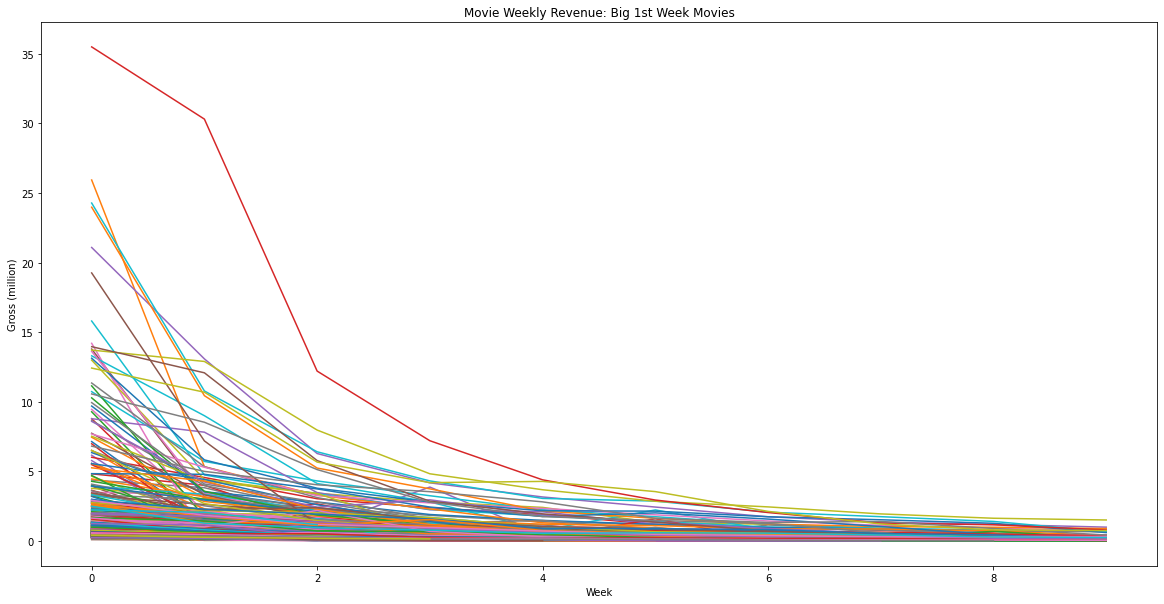

In [7]:
plt.figure(figsize=(20,10))
for i, mv in enumerate(db['IYWR']):
    plt.plot(range(len(mv['Week Revenue'][:10])), mv['Week Revenue'][:10]/1000000, label=db.iloc[i]['Title'])

plt.xlabel('Week')
plt.ylabel('Gross (million)')
#plt.legend()
plt.title('Movie Weekly Revenue: Big 1st Week Movies')
plt.show()

In [8]:
#da.sort_values('Total Revenue', ascending=False)
#db.sort_values('Total Revenue', ascending=False)
dz['IYWR'].apply(lambda x: x['Year'].iloc[0]).value_counts()
da['IYWR'].apply(lambda x: x['Year'].iloc[0]).value_counts()
db['IYWR'].apply(lambda x: x['Year'].iloc[0]).value_counts()

2016    77
2017    67
2018    66
2019    57
2015    55
2014    44
2020    36
2012    26
2011    26
2013    20
2021     6
Name: IYWR, dtype: int64

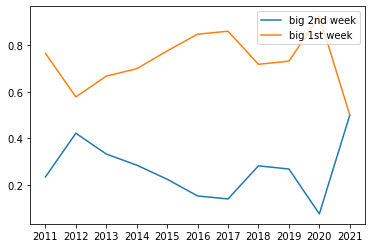

In [9]:
daa = da['IYWR'].apply(lambda x: x['Year'].iloc[0]).value_counts()/dz['IYWR'].apply(lambda x: x['Year'].iloc[0]).value_counts()
plt.plot(daa.index, daa, label='big 2nd week')
daa

dbb = db['IYWR'].apply(lambda x: x['Year'].iloc[0]).value_counts()/dz['IYWR'].apply(lambda x: x['Year'].iloc[0]).value_counts()
plt.plot(dbb.index, dbb, label='big 1st week')
dbb
plt.xticks(range(2011,2022))
plt.legend(loc='upper right')
plt.show()

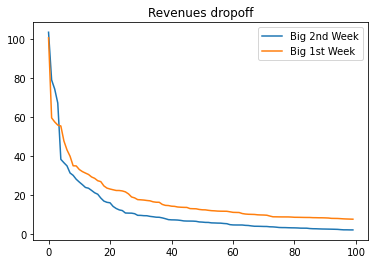

In [13]:
daaa = da.sort_values('Total Revenue', ascending=False)
plt.plot(range(100), daaa['Total Revenue'].iloc[:100]/1000000, label='Big 2nd Week')
dbbb = db.sort_values('Total Revenue', ascending=False)
plt.plot(range(100), dbbb['Total Revenue'].iloc[:100]/1000000, label='Big 1st Week')
plt.legend()
plt.title('Revenues dropoff')
plt.show()

#### 1. Classify a movie: Big 1st Week - Big 2nd Week, Which Season?
#### 2. Find a linear or non-linear relation betwwen variables
#### 3. Predict movie's total revenue
#### 4. Help movie theaters choose which movies are economically viable to continue screening, and when to pull the plug

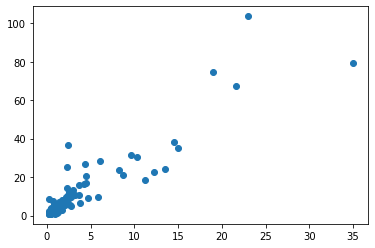

In [122]:
dz = pd.read_json('elcinema3.json')
dz['IYWR'] = dz['IYWR'].apply(pd.DataFrame.from_dict)

plt.scatter(da['IYWR'].apply(lambda x: x['Week Revenue'].iloc[1]/1000000), da['Total Revenue']/1000000)
plt.show()


In [134]:
qq = db['IYWR'].apply(lambda x: x['Week Revenue'].iloc[0]/1000000)
j1 = db['IYWR'].apply(lambda x: x['Week Revenue'].iloc[1]/1000000 if len(x['Index'])>1 else 0)
j2 = db['IYWR'].apply(lambda x: x['Week Revenue'].iloc[2]/1000000 if len(x['Index'])>2 else 0)
j3 = db['IYWR'].apply(lambda x: x['Week Revenue'].iloc[3]/1000000 if len(x['Index'])>3 else 0)
je = db['IYWR'].apply(lambda x: len(x['Week Revenue']))
jt = db['IYWR'].apply(lambda x: x['Index'].mean())
rr = pd.DataFrame([qq, j1, j2, j3, je, jt, db['Rating'], db['Total Revenue']/1000000]).transpose()
rr.columns = ['1st week rev', '2nd week rev', '3rd week rev', '4th week rev', 'n of weeks', 'avg boxoffice', 'Rating', 'Total Revenue']

In [135]:
rr

,1st week rev,2nd week rev,3rd week rev,4th week rev,n of weeks,avg boxoffice,Rating,Total Revenue
0,0.852249,0.731544,0.627935,0.539000,9.0,6.888889,7.2,17.543670
1,0.754077,0.658870,0.575684,0.503000,9.0,8.000000,8.2,11.888857
2,0.718571,0.502425,0.351296,0.245626,13.0,4.923077,3.7,4.863597
3,0.458906,0.311322,0.211201,0.143279,13.0,6.230769,5.8,4.561164
4,0.154265,0.095981,0.059718,0.037156,13.0,8.230769,7.5,13.875419
...,...,...,...,...,...,...,...,...
1718,0.381562,0.371008,0.086432,0.053016,5.0,8.400000,5.8,0.921136
1725,0.594163,0.477685,0.295086,0.186766,10.0,6.500000,5.9,2.223563
1726,0.435463,0.374221,0.270475,0.160330,9.0,8.222222,5.8,1.650389
1750,0.424660,0.275056,0.194944,0.158921,4.0,3.000000,6.0,1.053581


In [136]:
rr.corr()

,1st week rev,2nd week rev,3rd week rev,4th week rev,n of weeks,avg boxoffice,Rating,Total Revenue
1st week rev,1.000000,0.860914,0.836826,0.797215,0.444329,-0.269635,0.104680,0.934771
2nd week rev,0.860914,1.000000,0.952154,0.888532,0.437092,-0.270238,0.195896,0.950440
3rd week rev,0.836826,0.952154,1.000000,0.940991,0.488183,-0.309380,0.242857,0.954679
4th week rev,0.797215,0.888532,0.940991,1.000000,0.529035,-0.308497,0.251957,0.925708
n of weeks,0.444329,0.437092,0.488183,0.529035,1.000000,0.033498,-0.010133,0.517647
avg boxoffice,-0.269635,-0.270238,-0.309380,-0.308497,0.033498,1.000000,-0.290306,-0.311151
Rating,0.104680,0.195896,0.242857,0.251957,-0.010133,-0.290306,1.000000,0.180192
Total Revenue,0.934771,0.950440,0.954679,0.925708,0.517647,-0.311151,0.180192,1.000000


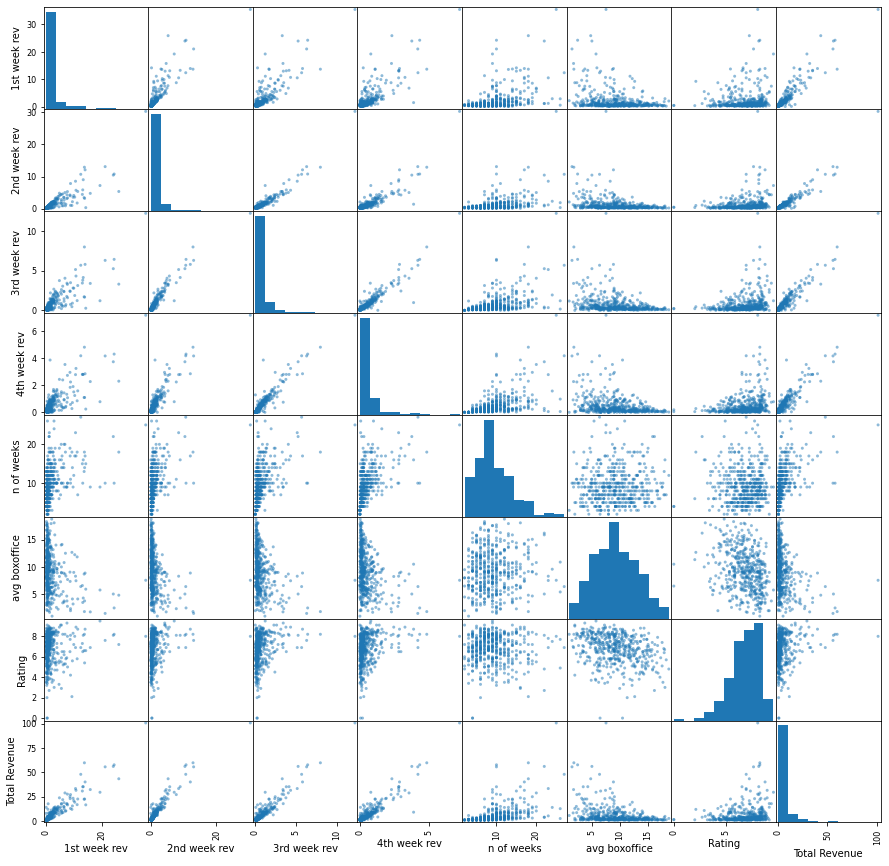

In [137]:
pd.plotting.scatter_matrix(rr, figsize=(15,15))
plt.show()